In [2]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

print(heart_disease.metadata)

print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [5]:
%pip install xgboost scikit-learn pandas

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
import xgboost as xgb

In [11]:
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Veriyi train-test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standardize edelim
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Tüm veri seti için standardizasyon
X_train = scaler.fit_transform(X_train)  # Eğitim seti için standardizasyon
X_test = scaler.transform(X_test)  # Test seti için standardizasyon (fit_transform değil, sadece transform kullanıyoruz)

# Dönüştürülmüş verileri DataFrame'e çevirelim
X = pd.DataFrame(X, columns=heart_disease.data.features.columns)
X_train = pd.DataFrame(X_train, columns=heart_disease.data.features.columns)
X_test = pd.DataFrame(X_test, columns=heart_disease.data.features.columns)

# Verilerin boyutlarını kontrol edelim
print("Toplam veri boyutu:", X.shape)
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

# İlk birkaç satırı kontrol edelim
print("\nİşlenmiş verinin ilk 5 satırı:")
print(X.head())

Toplam veri boyutu: (303, 13)
Eğitim seti boyutu: (242, 13)
Test seti boyutu: (61, 13)

İşlenmiş verinin ilk 5 satırı:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.017197 -0.696631  1.087338  2.274579 -0.718306  0.653650  
1 -1.821905  1.435481  0.397182  0.649113  2.487269 -0.895552  
2 -0.902354  1.435481  1.346147  0.649113  1.418744  1.170051  
3  1.637359 -0.696631  2.122573  2.274579 -0.718306 -0.895552  
4  0.980537 -0.696631  0.310912 -0.976352 -0.718306 -0.895552  


In [12]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [13]:
# Tahmin yapalım
y_pred = xgb_clf.predict(X_test)

# Modelin doğruluğunu değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detaylı sınıflandırma raporu
target_names = ['No Disease', 'Has Disease']  # Heart Disease için sınıf isimleri
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix'i görselleştirelim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print("\nAdditional Metrics:")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

from sklearn.metrics import roc_curve, auc
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 47.54%

Detailed Classification Report:


ValueError: Number of classes, 5, does not match size of target_names, 2. Try specifying the labels parameter

Accuracy: 47.54%

Detailed Classification Report:
                     precision    recall  f1-score   support

         No Disease       0.76      0.90      0.83        29
     Slight Disease       0.00      0.00      0.00        12
   Moderate Disease       0.20      0.22      0.21         9
     Severe Disease       0.12      0.14      0.13         7
Very Severe Disease       0.00      0.00      0.00         4

           accuracy                           0.48        61
          macro avg       0.22      0.25      0.23        61
       weighted avg       0.41      0.48      0.44        61



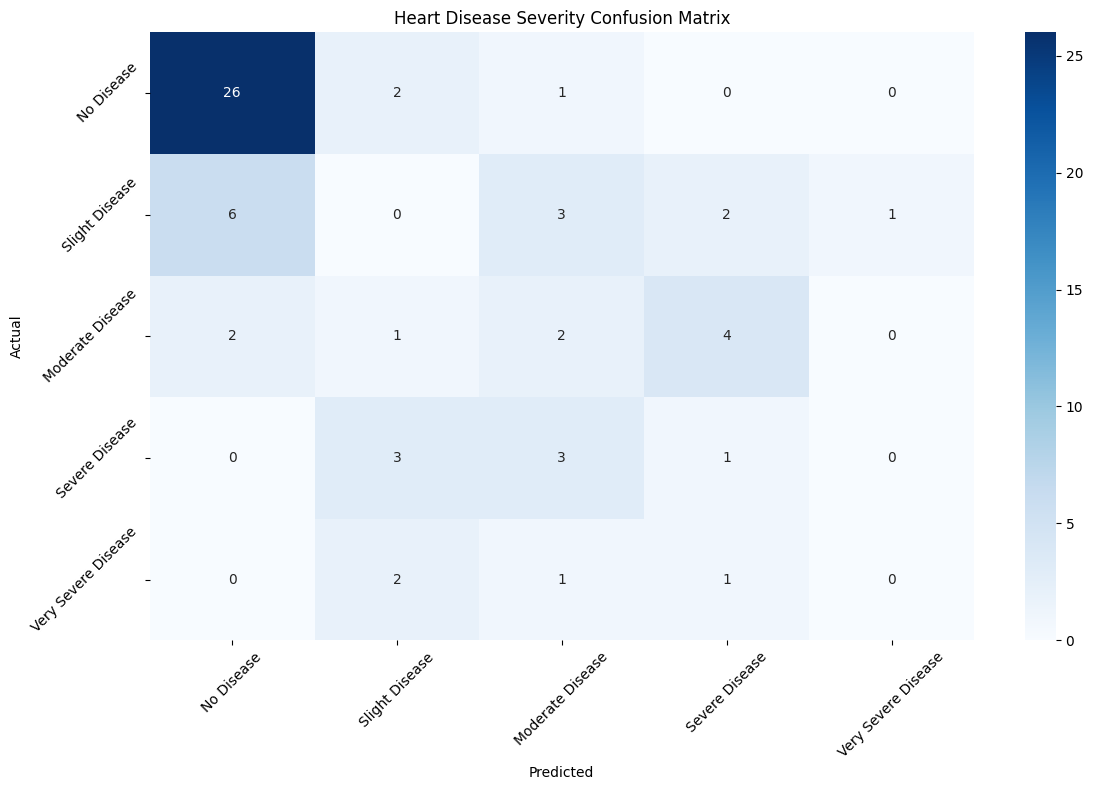


Additional Metrics:
Macro Precision: 0.218
Macro Recall: 0.252
Macro F1 Score: 0.234

Weighted Precision: 0.407
Weighted Recall: 0.475
Weighted F1 Score: 0.439


In [14]:
# Tahmin yapalım
y_pred = xgb_clf.predict(X_test)

# Modelin doğruluğunu değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Sınıf isimlerini tanımlayalım
target_names = ['No Disease',
                'Slight Disease',
                'Moderate Disease',
                'Severe Disease',
                'Very Severe Disease']

# Detaylı sınıflandırma raporu
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix'i görselleştirelim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Heart Disease Severity Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Ek metrikler
from sklearn.metrics import precision_score, recall_score, f1_score

print("\nAdditional Metrics:")
print(f"Macro Precision: {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Macro Recall: {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"Macro F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}")

print(f"\nWeighted Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

<ipython-input-15-3cbeeedcf157>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


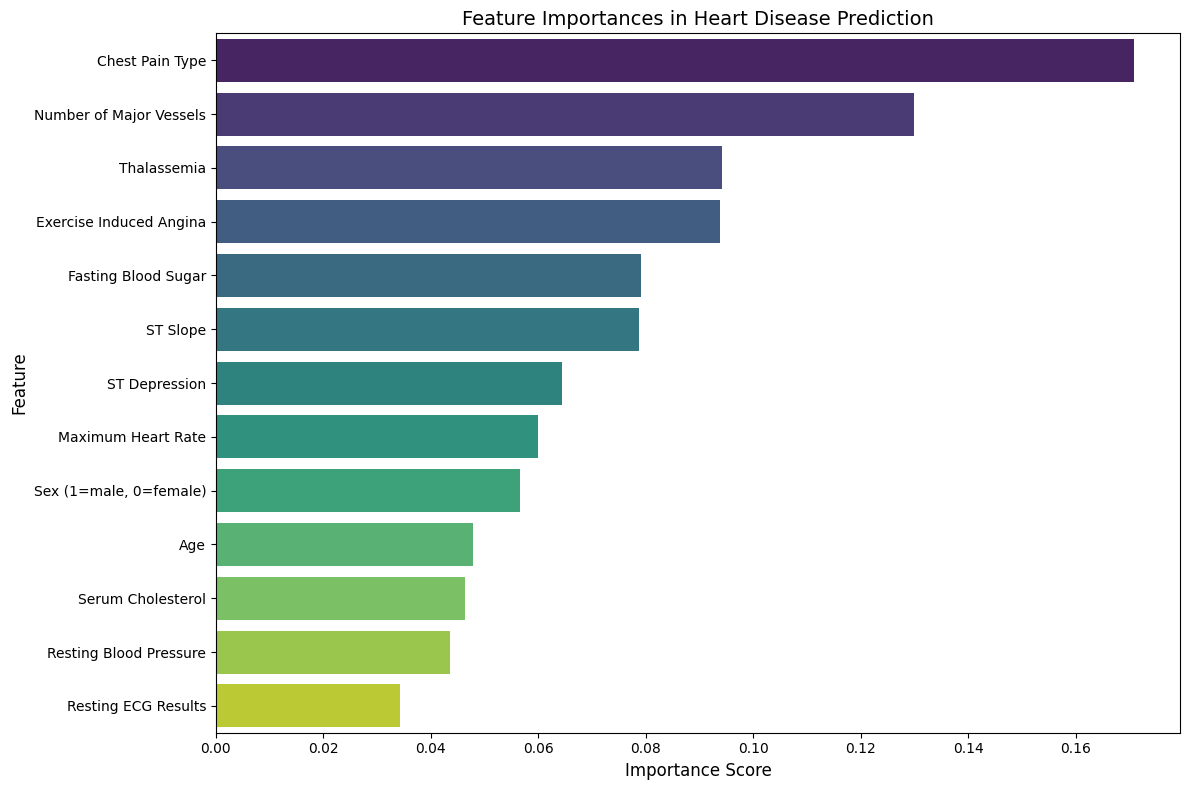


Feature Importances:
            Description  Feature  Importance
        Chest Pain Type       cp    0.170902
Number of Major Vessels       ca    0.129906
            Thalassemia     thal    0.094249
Exercise Induced Angina    exang    0.093905
    Fasting Blood Sugar      fbs    0.079066
               ST Slope    slope    0.078802
          ST Depression  oldpeak    0.064488
     Maximum Heart Rate  thalach    0.060028
 Sex (1=male, 0=female)      sex    0.056670
                    Age      age    0.047846
      Serum Cholesterol     chol    0.046418
 Resting Blood Pressure trestbps    0.043506
    Resting ECG Results  restecg    0.034214

Top 5 Most Important Features:
            Description Feature  Importance
        Chest Pain Type      cp    0.170902
Number of Major Vessels      ca    0.129906
            Thalassemia    thal    0.094249
Exercise Induced Angina   exang    0.093905
    Fasting Blood Sugar     fbs    0.079066


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Özellik isimlerini alalım
features = heart_disease.data.features.columns

# Özellik önemliliklerini alalım
feature_importances = xgb_clf.feature_importances_

# Görselleştirme için DataFrame oluşturalım
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Önem sırasına göre sıralayalım
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Özellik önemliliklerini görselleştirelim
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances in Heart Disease Prediction', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Feature isimlerinin açıklamalarını ekleyelim
feature_descriptions = {
    'age': 'Age',
    'sex': 'Sex (1=male, 0=female)',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure',
    'chol': 'Serum Cholesterol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG Results',
    'thalach': 'Maximum Heart Rate',
    'exang': 'Exercise Induced Angina',
    'oldpeak': 'ST Depression',
    'slope': 'ST Slope',
    'ca': 'Number of Major Vessels',
    'thal': 'Thalassemia'
}

# Y eksenindeki etiketleri daha anlaşılır hale getirelim
plt.yticks(range(len(features)),
           [feature_descriptions.get(feat, feat) for feat in importance_df['Feature']])

plt.tight_layout()
plt.show()

# Özellik önemliliklerini tablo olarak da gösterelim
print("\nFeature Importances:")
importance_df['Description'] = importance_df['Feature'].map(feature_descriptions)
importance_df = importance_df[['Description', 'Feature', 'Importance']]
print(importance_df.to_string(index=False))

# En önemli 5 özelliği vurgulayalım
print("\nTop 5 Most Important Features:")
print(importance_df.head().to_string(index=False))